In [ ]:
!pip install --upgrade gensim -q

In [ ]:
!python -m spacy download en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 2.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
!pip install nltk

In [ ]:
# imports the essential libraries
import re
import string
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from textblob import TextBlob
from wordcloud import WordCloud
from collections import Counter
from collections import Counter, defaultdict

In [ ]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
import spacy

In [ ]:
import gensim
gensim.__version__
import gensim.downloader as api
from gensim.models import word2vec
from gensim.models.word2vec import Word2Vec

'4.3.2'

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.util import ngrams

In [ ]:
# Load the English language model in spaCy
nlp = spacy.load("en_core_web_lg")

In [ ]:
from google.colab import drive
# Mount your Google Drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
# Load Gensim's pre-trained Word2Vec model
word_vectors = api.load("word2vec-google-news-300")

In [ ]:
# Read the dataset from the specified path
df = pd.read_csv('/content/fake_real.csv', sep=',', encoding='utf-8', quotechar='"')


# **Exploratory Data Analysis**

In [ ]:
# Display the first few rows of the DataFrame
df.head()

,title,text,subject,date,type
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",True
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",True
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",True
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",True
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",True


In [ ]:
# Display the last few rows of the DataFrame
df.tail()

,title,text,subject,date,type
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",Fake
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",Fake
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",Fake
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",Fake
44897,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",Fake


In [ ]:
#check the distribution of Types
df['subject'].value_counts()

subject
politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: count, dtype: int64

In [ ]:
# Get the dimensions of the DataFrame (rows, columns)
print("\nDimensions of the DataFrame:")
df.shape


Dimensions of the DataFrame:


(44898, 5)

In [ ]:
df.columns

Index(['title', 'text', 'subject', 'date', 'type'], dtype='object')

In [ ]:
# Get a concise summary of the DataFrame including column data types and non-null values
print("\nSummary of the DataFrame:")
df.info()


Summary of the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   type     44898 non-null  object
dtypes: object(5)
memory usage: 1.7+ MB


**Clean the text data**

In [ ]:
# Check if the 'text' column is not of string data type
if df['text'].dtype != 'object':
    # Convert 'text' column to string
    df['text'] = df['text'].astype(str)
    print("Converted 'text' column to string data type.")
else:
    print("The 'text' column is already of string data type.")

The 'text' column is already of string data type.


In [ ]:
# Check for missing values in each column
print("\nMissing values in each column:")
df.isnull().sum()


Missing values in each column:


title      0
text       0
subject    0
date       0
type       0
dtype: int64

In [ ]:
df['subject'].value_counts()

subject
politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: count, dtype: int64

<ipython-input-11-70cf66024574>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='subject', data=df, palette=custom_palette)


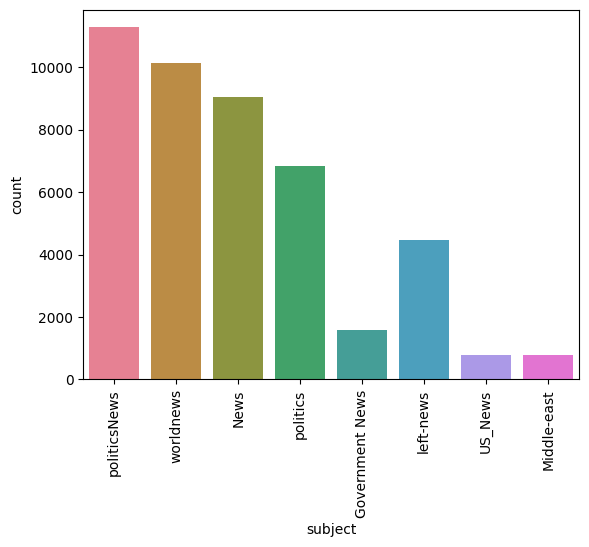

In [ ]:
# Set a custom palette with distinct colors for each subject category
custom_palette = sns.color_palette("husl", len(df['subject'].unique()))

# Create a countplot with Seaborn and specify the custom palette
sns.countplot(x='subject', data=df, palette=custom_palette)

# Rotate x-axis labels vertically
plt.xticks(rotation='vertical')

# Show the plot
plt.show()

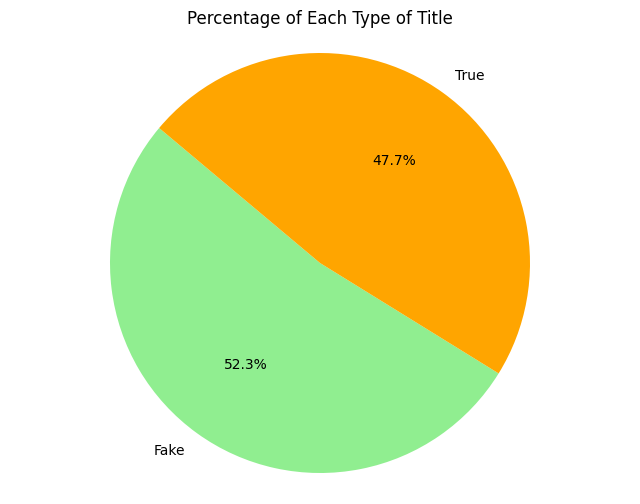

In [ ]:
# Calculate the percentage of each type of title
title_percentage = df['type'].value_counts(normalize=True) * 100

# Plotting
plt.figure(figsize=(8, 6))
# Define colors for each type of title
colors = ['lightgreen', 'orange']
plt.pie(title_percentage, labels=title_percentage.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Percentage of Each Type of Title')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

In [ ]:
# Display unique values in the 'type' column
print("\nUnique values in the 'type' column:")
df['type'].unique()


Unique values in the 'type' column:


array(['True', 'Fake'], dtype=object)

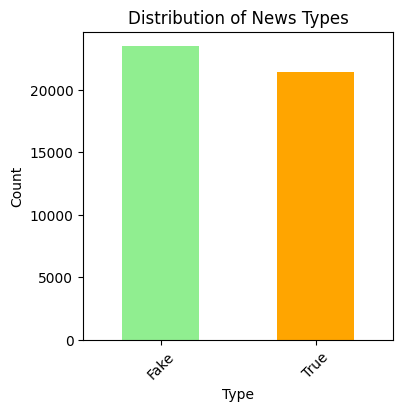

In [ ]:
# Explore unique values in the 'Type' column
type_counts = df['type'].value_counts()

# Define colors for different types
colors = ['lightgreen', 'orange']

# Plot the counts
plt.figure(figsize=(4, 4))
type_counts.plot(kind='bar', color=colors)
plt.title('Distribution of News Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# **Data Preprocessing:**


In [ ]:
#Add the new column which gives a unique number to each of these labels

df['type_num'] = df['type'].map({'Fake' : 0, 'True': 1})

#check the results with top 5 rows
df.head(5)

,title,text,subject,date,type,type_num
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",True,1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",True,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",True,1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",True,1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",True,1


In [ ]:
# Remove unwanted column ('Unnamed: 0','Title', 'Type')
df=df.drop(['title','subject','date','type'],axis=1)

In [ ]:
df.head()

,Content,Type_num
0,new york reuters us environmental group sierra...,1
1,washington reuters us air force asked industry...,1
2,saturday paul ryan posted photo instagram phot...,0
3,america keeps waiting word hillary indicted ob...,0
4,religion peace ht weasel zippers,0


**processing the text data using spaCy**


In [ ]:
def process_Content(text):
    # Function to remove punctuation marks from text
    def remove_punctuation(text):
        punctuation_pattern = r'[^\w\s]'
        cleaned_text = re.sub(punctuation_pattern, '', text)
        return cleaned_text

    # Function to remove special characters and numbers from text
    def remove_special_characters_and_numbers(text):
        special_characters_and_numbers_pattern = r'[^a-zA-Z\s]'
        cleaned_text = re.sub(special_characters_and_numbers_pattern, '', text)
        return cleaned_text

    # Function to remove digits from text
    def remove_digits(text):
        digit_pattern = r'\d+'
        cleaned_text = re.sub(digit_pattern, '', text)
        return cleaned_text

    # Function to convert text to lowercase
    def convert_to_lowercase(text):
        return text.lower()

    # Function to tokenize the text
    def tokenize_text(text):
        return word_tokenize(text)

    # Function to remove stopwords from tokens
    def remove_stopwords(tokens):
        stop_words = set(stopwords.words('english'))
        return [token for token in tokens if token not in stop_words]

    # Function to lemmatize tokens using spaCy
    def lemmatize_tokens(tokens):
        return [token.lemma_ for token in nlp(" ".join(tokens))]

    # Function to join tokens back into a single string
    def join_tokens(tokens):
        return ' '.join(tokens)

    cleaned_text = remove_punctuation(text)
    cleaned_text = remove_special_characters_and_numbers(cleaned_text)
    cleaned_text = remove_digits(cleaned_text)  # Remove digits
    cleaned_text = convert_to_lowercase(cleaned_text)
    tokens = tokenize_text(cleaned_text)
    tokens = remove_stopwords(tokens)
    tokens = lemmatize_tokens(tokens)
    processed_Content = join_tokens(tokens)

    return processed_Content

# Apply the process_Content function to the 'Content' column
df['Processed_Content'] = df['Content'].apply(process_Content)

# Display the DataFrame after text preprocessin
df.head()

,Content,Type_num,Processed_Content
0,new york reuters us environmental group sierra...,1,new york reuters us environmental group sierra...
1,washington reuters us air force asked industry...,1,washington reuters us air force ask industry f...
2,saturday paul ryan posted photo instagram phot...,0,saturday paul ryan post photo instagram photo ...
3,america keeps waiting word hillary indicted ob...,0,america keep wait word hillary indict obama wa...
4,religion peace ht weasel zippers,0,religion peace ht weasel zipper


In [ ]:
# Define a function for vectorization
def vectorize_text(text):
    # Tokenize the text
    tokens = nlp(text)

    # Vectorize the tokens
    word_vectors = np.array([token.vector for token in tokens])

    # Take the mean of word vectors to get the sentence vector
    if word_vectors.size == 0:
        sentence_vector = np.zeros(300)  # Return zero vector if no word vectors found
    else:
        sentence_vector = np.mean(word_vectors, axis=0)

    return sentence_vector

# Apply vectorization to each processed text in the "Processed_Content" column
df["Vectorized_Content"] = df["Processed_Content"].apply(vectorize_text)

# Display the vectorized text
df.head()

,Content,Type_num,Processed_Content,Vectorized_Content
0,new york reuters us environmental group sierra...,1,new york reuters us environmental group sierra...,"[0.15437132, 0.44971296, -1.3431746, 0.1739993..."
1,washington reuters us air force asked industry...,1,washington reuters us air force ask industry f...,"[0.077355824, 1.37253, -1.4076048, 1.1777242, ..."
2,saturday paul ryan posted photo instagram phot...,0,saturday paul ryan post photo instagram photo ...,"[-0.6284751, 0.8629947, -1.9397669, 0.35534674..."
3,america keeps waiting word hillary indicted ob...,0,america keep wait word hillary indict obama wa...,"[-0.41668746, 0.2454972, -1.1408185, 0.3210229..."
4,religion peace ht weasel zippers,0,religion peace ht weasel zipper,"[-1.7708981, 1.8078121, -2.807322, 1.563702, 1..."


**Attempt 2:**

* use spacy glove embeddings for text vectorization.
* use MultinomialNB as the classifier after applying the MinMaxscaler.
* print the classification report.

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report


#doing scaling because Negative values will not pass into Naive Bayes models
scaler = MinMaxScaler()
scaled_train_embed = scaler.fit_transform(X_train_2d)
scaled_test_embed = scaler.transform(X_test_2d)

#1. creating a MultinomialNB model object
clf = MultinomialNB()

#2. fit with all_train_embeddings and y_train
clf.fit(scaled_train_embed , y_train)


#3. get the predictions for all_test_embeddings and store it in y_pred
y_pred = clf.predict(scaled_test_embed)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83      4570
           1       0.81      0.83      0.82      4284

    accuracy                           0.83      8854
   macro avg       0.83      0.83      0.83      8854
weighted avg       0.83      0.83      0.83      8854



**Attempt 3:**

* use spacy glove embeddings for text vectorization.
* use KNeighborsClassifier as the classifier after applying the MinMaxscaler.
* print the classification report.

In [ ]:
from  sklearn.neighbors import KNeighborsClassifier


#1. creating a KNN model object
clf = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')

#2. fit with all_train_embeddings and y_train
clf.fit(X_train_2d, y_train)


#3. get the predictions for all_test_embeddings and store it in y_pred
y_pred = clf.predict(X_test_2d)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92      4570
           1       0.89      0.93      0.91      4284

    accuracy                           0.91      8854
   macro avg       0.91      0.92      0.91      8854
weighted avg       0.92      0.91      0.91      8854



**Attempt 4:**

* use spacy glove embeddings for text vectorization.
* use RandomForestClassifier as the classifier after applying the MinMaxscaler.
* print the classification report.

In [ ]:
from sklearn.ensemble import RandomForestClassifier


#1. creating a Random Forest model object
clf = RandomForestClassifier()


#2. fit with all_train_embeddings and y_train
clf.fit(X_train_2d, y_train)


#3. get the predictions for all_test_embeddings and store it in y_pred
y_pred = clf.predict(X_test_2d)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94      4570
           1       0.94      0.94      0.94      4284

    accuracy                           0.94      8854
   macro avg       0.94      0.94      0.94      8854
weighted avg       0.94      0.94      0.94      8854



**Attempt 5:**

* use spacy glove embeddings for text vectorization.
* use GradientBoostingClassifier as the classifier after applying the MinMaxscaler.
* print the classification report.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier


#1. creating a GradientBoosting model object
clf = GradientBoostingClassifier()

#2. fit with all_train_embeddings and y_train
clf.fit(X_train_2d, y_train)


#3. get the predictions for all_test_embeddings and store it in y_pred
y_pred = clf.predict(X_test_2d)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93      4570
           1       0.92      0.93      0.92      4284

    accuracy                           0.93      8854
   macro avg       0.93      0.93      0.93      8854
weighted avg       0.93      0.93      0.93      8854



In [ ]:
test_news = [
    "Michigan governor denies misleading U.S. House on Flint water (Reuters) - Michigan Governor Rick Snyder denied Thursday that he had misled a U.S. House of Representatives committee last year over testimony on Flintâ€™s water crisis after lawmakers asked if his testimony had been contradicted by a witness in a court hearing. The House Oversight and Government Reform Committee wrote Snyder earlier Thursday asking him about published reports that one of his aides, Harvey Hollins, testified in a court hearing last week in Michigan that he had notified Snyder of an outbreak of Legionnairesâ€™ disease linked to the Flint water crisis in December 2015, rather than 2016 as Snyder had testified. â€œMy testimony was truthful and I stand by it,â€ Snyder told the committee in a letter, adding that his office has provided tens of thousands of pages of records to the committee and would continue to cooperate fully.  Last week, prosecutors in Michigan said Dr. Eden Wells, the stateâ€™s chief medical executive who already faced lesser charges, would become the sixth current or former official to face involuntary manslaughter charges in connection with the crisis. The charges stem from more than 80 cases of Legionnairesâ€™ disease and at least 12 deaths that were believed to be linked to the water in Flint after the city switched its source from Lake Huron to the Flint River in April 2014. Wells was among six current and former Michigan and Flint officials charged in June. The other five, including Michigan Health and Human Services Director Nick Lyon, were charged at the time with involuntary manslaughter",
    " WATCH: Fox News Host Loses Her Sh*t, Says Investigating Russia For Hacking Our Election Is Unpatriotic This woman is insane.In an incredibly disrespectful rant against President Obama and anyone else who supports investigating Russian interference in our election, Fox News host Jeanine Pirro said that anybody who is against Donald Trump is anti-American. Look, it s time to take sides,  she began.",
    " Sarah Palin Celebrates After White Man Who Pulled Gun On Black Protesters Goes Unpunished (VIDEO) Sarah Palin, one of the nigh-innumerable  deplorables  in Donald Trump s  basket,  almost outdid herself in terms of horribleness on Friday."
]

# Preprocess and vectorize test news articles
processed_test_news = [process_Content(news) for news in test_news]
test_news_vectors = [vectorize_text(news) for news in processed_test_news]

# Use the classifier to predict labels for the vectorized test news
predicted_labels = clf.predict(test_news_vectors)
predicted_labels

array([1, 0, 0])

In [ ]:
def check_news(news):
    # Preprocess and vectorize the news article
    processed_news = process_Content(news)
    news_vector = vectorize_text(processed_news)

    # Predict the label using the classifier
    predicted_label = clf.predict([news_vector])[0]

    return predicted_label

# Get news input from the user
user_news = input("Enter the news article: ")

# Check the user-provided news
predicted_label = check_news(user_news)
print("Predicted Label:", predicted_label)

Enter the news article: About 100 people detained from Northeastern University pro-Palestinian protest
Predicted Label: 1


**Print the confusion Matrix with the best model got**

Text(95.72222222222221, 0.5, 'Truth')

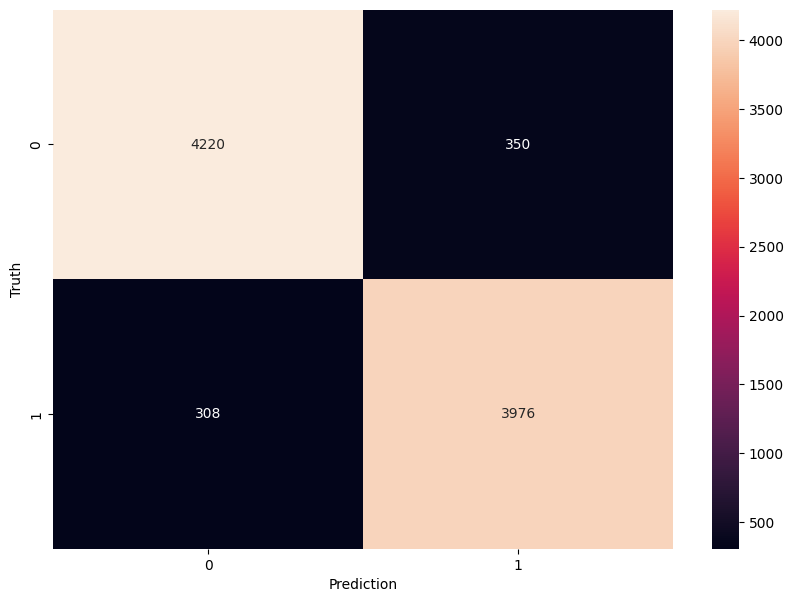

In [ ]:
# finally print the confusion matrix for the best model
# (GradientBoostingClassifier)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm


from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')